<a href="https://colab.research.google.com/github/argoubizakaria-web/SQL-VideoGame-Tournament-Analysis/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
loan= pd.read_csv ('/content/sample_data/loan.csv')

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [6]:
loan.head()

,Income,Loan Amount,Default
0,30,8,No
1,22,10,No
2,33,12,No
3,28,20,No
4,23,32,No


In [7]:
loan.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


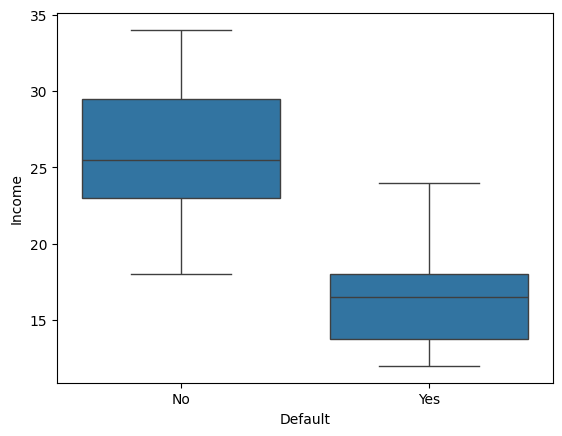

In [5]:
ax = sns.boxplot(x="Default", y="Income", data=loan)

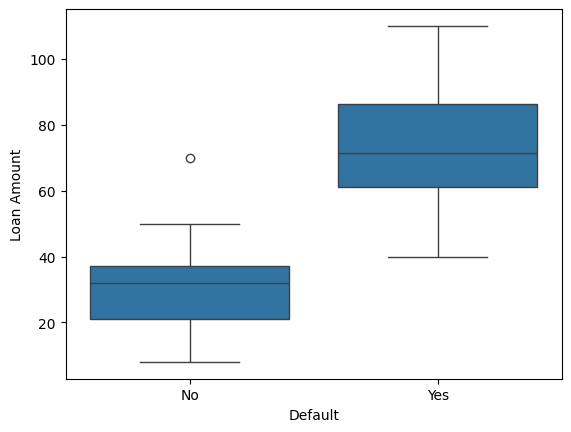

In [8]:
ax = sns.boxplot(x="Default", y="Loan Amount", data= loan)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

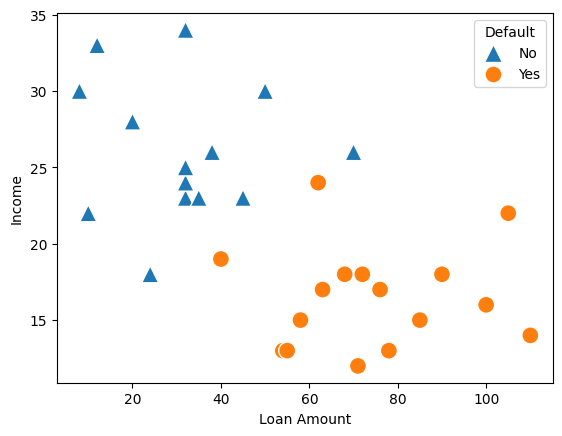

In [17]:
ax = sns.scatterplot(
    data=loan,
    x='Loan Amount',
    y='Income',
    hue='Default',    # 'h' minuscule et suppression de l'espace potentiel
    style='Default',
    markers=['^', 'o'], # 'o' au lieu de '°'
    s=150
)

plt.show()

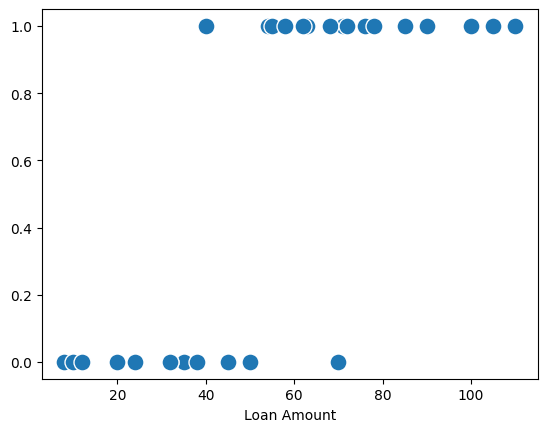

In [18]:
ax = sns.scatterplot(x= loan ['Loan Amount'], y = np.where(loan['Default']=='No',0,1), s=150)

Prepare Data

In [19]:
y = loan['Default'] # target dependent variables

In [21]:
X = loan[['Income', 'Loan Amount']] # Features independant variables

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,stratify=y , random_state=1234)

In [24]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

Train and evaluate Data

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
classifier = DecisionTreeClassifier(random_state=1234)

In [29]:
model = classifier.fit(X_train, y_train)

In [30]:
model.score(X_test, y_test)

1.0

Visualize The classification Tree

In [36]:
from sklearn import tree

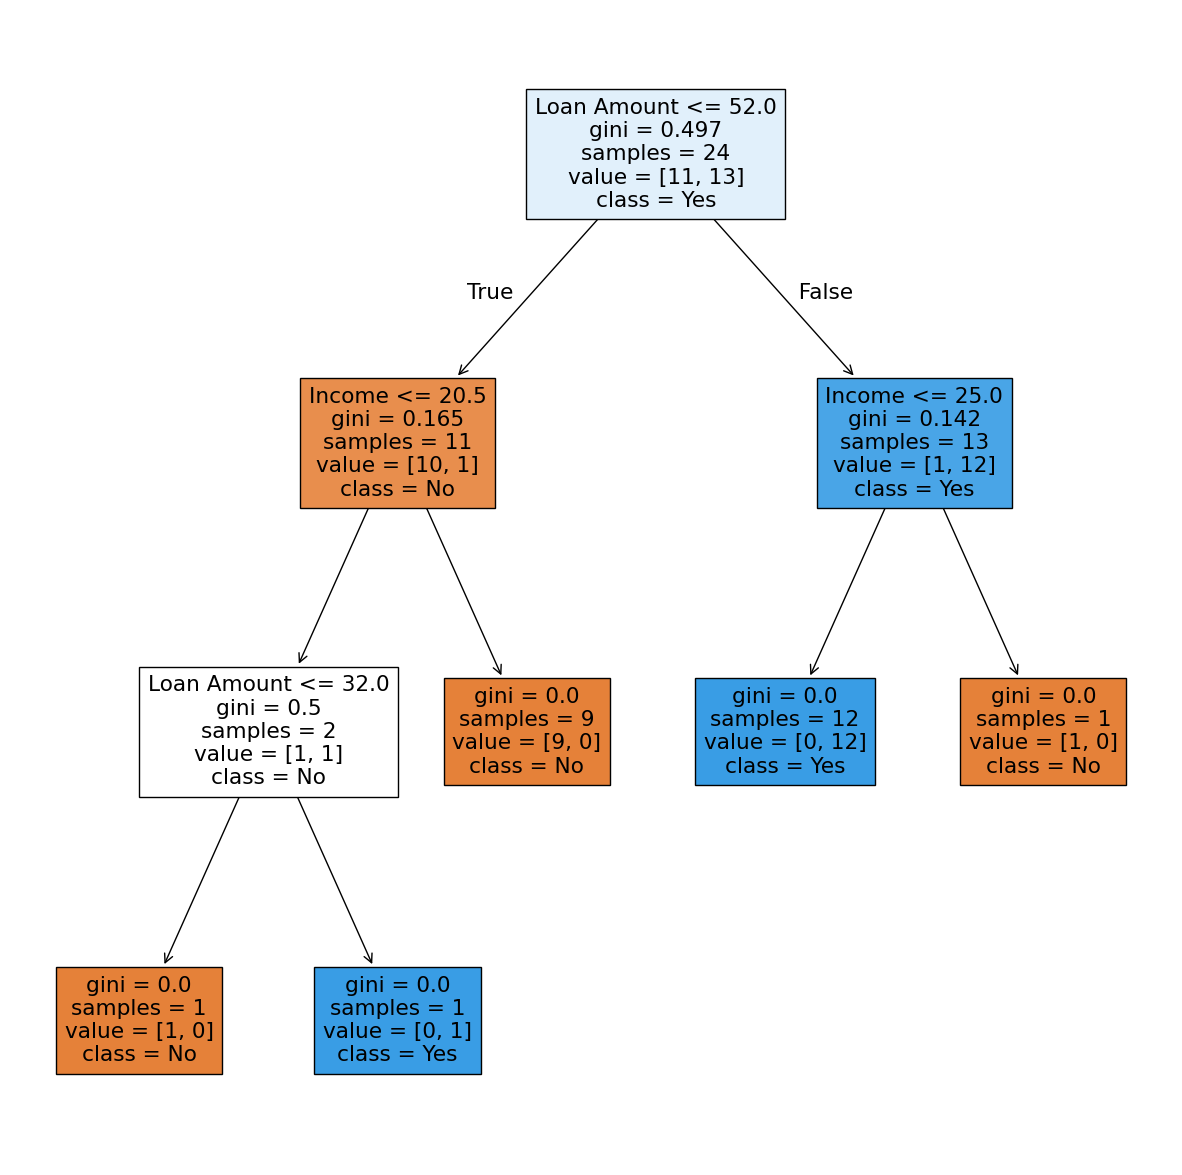

In [38]:
plt.figure(figsize=(15,15))
tree.plot_tree(model,
               feature_names= list(X.columns),
               class_names= ['No', 'Yes'],
               filled=True);


In [31]:
model.predict(X_test)

array(['No', 'No', 'Yes', 'No', 'Yes', 'Yes'], dtype=object)

In [56]:
model.score(X_test, y_test)

1.0

In [54]:
grid = {'max_depth': [2,3,4,5], 'min_samples_split': [2,3,4], 'min_samples_leaf': [1,2,3,4,5,6]}

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv= GridSearchCV(estimator=classifier, param_grid = grid)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [41]:
from sklearn.metrics import confusion_matrix

In [58]:
model.score(X_train, y_train)

1.0

In [40]:
confusion_matrix(y_test, model.predict(X_test))

array([[3, 1],
       [0, 5]])